<a href="https://colab.research.google.com/github/BabarMuaz/skinDiseaseDetection/blob/main/initialcustomModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy data to colab dir
!cp -rf /content/drive/MyDrive/Splitted_SuperCleanedDataset_70_20_10 /content

# to remove this folder
#%rm -rf Splitted_SuperCleanedDataset_70_20_10 

In [ ]:
#import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from tensorflow.keras import backend as K
from time import time
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import MaxPool2D
#from google.colab.patches import cv2_imshow
from keras.callbacks import ModelCheckpoint


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense , MaxPool2D   
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image
import os.path
import glob
import shutil
import random as rn
from sklearn.metrics import classification_report,confusion_matrix
import cv2

np.random.seed(42) # The below is necessary for starting Numpy generated random numbers
rn.seed(12345) # It is necessary for starting core Python generated random numbers

In [ ]:
# get paths to fetch data
train_path = "/content/Splitted_SuperCleanedDataset_70_20_10/train"
valid_path = "/content/Splitted_SuperCleanedDataset_70_20_10/val"
test_path = "/content/Splitted_SuperCleanedDataset_70_20_10/test"

In [ ]:
# Create Data Batches for training

train_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
                                         directory=train_path, 
                                         target_size=(224,224),  
                                         batch_size=3904,
                                         classes=['melanoma', 'nevus'], 
                                         class_mode='categorical',
                                         shuffle=True)

valid_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
                                         directory=valid_path, target_size=(224,224),
                                         batch_size=1088,
                                         classes=['melanoma', 'nevus'], 
                                         class_mode='categorical',
                                         shuffle=True)

test_batches = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
                                         directory=test_path, 
                                         target_size=(224,224), 
                                         batch_size=564,
                                         classes=['melanoma', 'nevus'], 
                                         class_mode='categorical',
                                         shuffle=True)

Found 3904 images belonging to 2 classes.
Found 1088 images belonging to 2 classes.
Found 564 images belonging to 2 classes.


In [ ]:
# checking how classes are labelled, somestimes depending on the server folders are stored alphabatelly or not
print("training data labelled as = ",train_batches.class_indices)
print("validation data labelled as = ",valid_batches.class_indices)
print("testing data labelled as = ",test_batches.class_indices)

training data labelled as =  {'melanoma': 0, 'nevus': 1}
validation data labelled as =  {'melanoma': 0, 'nevus': 1}
testing data labelled as =  {'melanoma': 0, 'nevus': 1}


In [ ]:
(x_train, y_train) = next(train_batches)  # creating one batch for training images, purpose is to put data on ram faster execution

In [ ]:
(x_test, y_test) = next(valid_batches)  # creating one batch for validation images, purpose is to put data on ram faster execution

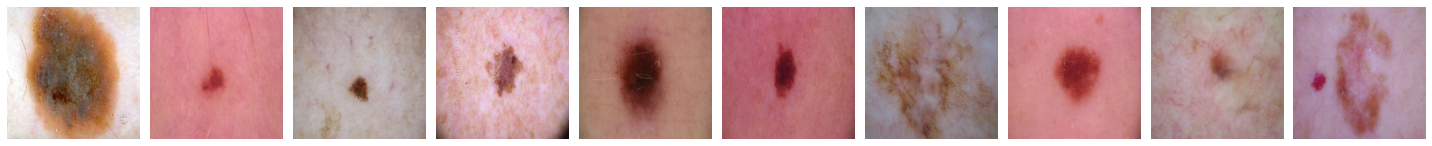

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# function to see images in Datagen, this is used to see images after preprocessing step
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(x_train)
print(y_train)

In [ ]:
# above ImageDataGenerator function along with next is used to put data on ram
# when data is on ram training is very quick, CAUTION: only do this if your dataset can fit on ram
# if dataaugmentation, than apply here
datagen = ImageDataGenerator()		
# data in batches is fed to model using this 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization

In [ ]:

model = Sequential()
# 1st convolutional layer
model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='1stpooling'))
# 2nd convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='2ndpooling'))
# 3rd convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='3rdpooling'))
# classifier
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='1stdense'))
model.add(Dense(64, activation='relu', name='2nddense'))
model.add(Dense(2, activation='softmax', name='output'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 1stpooling (MaxPooling2D)   (None, 112, 112, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 2ndpooling (MaxPooling2D)   (None, 56, 56, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 3rdpooling (MaxPooling2D)   (None, 28, 28, 128)       0         
                                                                 
 flatten (Flatten)           (None, 100352)           

In [ ]:
base_learning_rate = 0.002
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


#create callback
filepath = 'best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
# train model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=x_train.shape[0]//32,
                    epochs = 50 , 
                    validation_data = (x_test, y_test),
                    callbacks=callbacks)

Epoch 1/50
121/122 [============================>.] - ETA: 0s - loss: 0.8490 - accuracy: 0.6175
Epoch 1: val_loss improved from inf to 0.48615, saving model to best_model.hdf5
122/122 [==============================] - 16s 48ms/step - loss: 0.8463 - accuracy: 0.6181 - val_loss: 0.4861 - val_accuracy: 0.7638
Epoch 2/50
121/122 [============================>.] - ETA: 0s - loss: 0.5697 - accuracy: 0.7107
Epoch 2: val_loss did not improve from 0.48615
122/122 [==============================] - 5s 37ms/step - loss: 0.5693 - accuracy: 0.7118 - val_loss: 0.5282 - val_accuracy: 0.8143
Epoch 3/50
121/122 [============================>.] - ETA: 0s - loss: 0.4575 - accuracy: 0.7913
Epoch 3: val_loss improved from 0.48615 to 0.45874, saving model to best_model.hdf5
122/122 [==============================] - 5s 42ms/step - loss: 0.4572 - accuracy: 0.7910 - val_loss: 0.4587 - val_accuracy: 0.7914
Epoch 4/50
121/122 [============================>.] - ETA: 0s - loss: 0.4143 - accuracy: 0.8060
Epoch 4:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


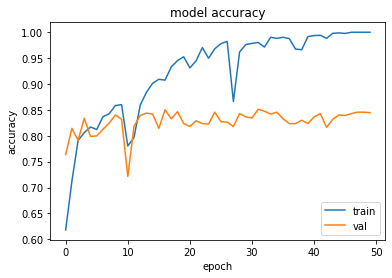

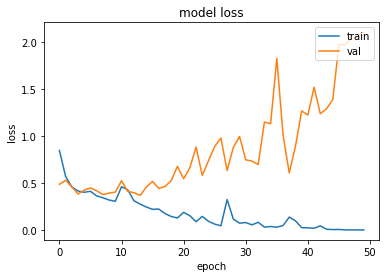

In [ ]:
# Plot Training accuracy and loss grpahs

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# load the best saved model 
model = tf.keras.models.load_model('best_model.hdf5')

In [ ]:
# get testing data
(img, label) = next(test_batches)  # creating one batch for testing images, purpose is to put data on ram faster execution

In [ ]:
# print classification sumamry
predict_x=model.predict(img) 
predictions=np.argmax(predict_x,axis=1)
predictions = predictions.reshape(1,-1)[0]
label=np.argmax(label,axis=1)
label = label.reshape(1,-1)[0]
print(classification_report(label, predictions, target_names = ['melanoma','nevus']))

              precision    recall  f1-score   support

    melanoma       0.80      0.87      0.83       282
       nevus       0.85      0.78      0.82       282

    accuracy                           0.82       564
   macro avg       0.83      0.82      0.82       564
weighted avg       0.83      0.82      0.82       564



In [ ]:
# This function is used to create Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[244  38]
 [ 61 221]]


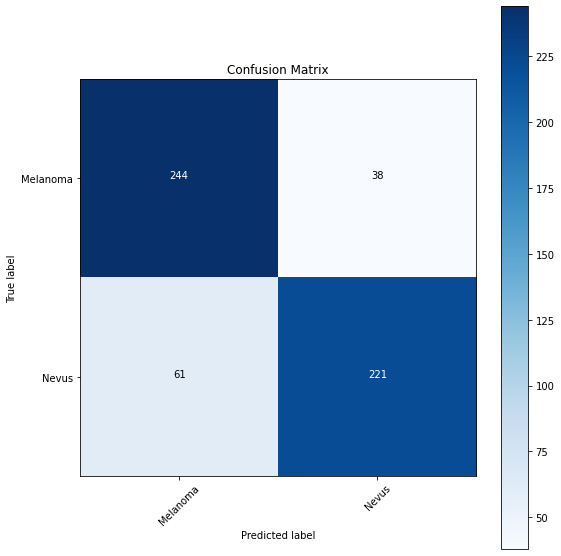

In [ ]:
# calling confsion matrix function

cm_aug = confusion_matrix(label, predictions)
plot_confusion_matrix(cm_aug, classes = ['Melanoma','Nevus'], title='Confusion Matrix', normalize=False)